# Regression Task


In [1]:
import pandas as pd 
import numpy as np    

In [2]:
df = pd.read_csv('homeprices.csv', header = None)  #reading csv file using pandas
df

,0,1,2,3
0,2600,3,20,550000
1,3000,4,15,565000
2,3200,2,18,610000
3,3600,3,30,595000
4,4000,5,8,760000
5,4100,6,8,810000


In [3]:
#bias term to adjust final output
df = pd.concat([pd.Series(1, index=df.index, name='bias term'), df], axis=1)  #to combine an extra series "bias term" with value 1 in each row
df.head()  # to show just 5 rows of the dataframe

,bias term,0,1,2,3
0,1,2600,3,20,550000
1,1,3000,4,15,565000
2,1,3200,2,18,610000
3,1,3600,3,30,595000
4,1,4000,5,8,760000


In [4]:
#input column as X
X = df.drop(columns=3)   #drop last column(output column)
X.head()

,bias term,0,1,2
0,1,2600,3,20
1,1,3000,4,15
2,1,3200,2,18
3,1,3600,3,30
4,1,4000,5,8


In [5]:
#output column as y
y = df.iloc[:, 4]  # take 4th column as y
y

0    550000
1    565000
2    610000
3    595000
4    760000
5    810000
Name: 3, dtype: int64

In [6]:
#normalization(as we have big datas)
for i in range(1, len(X.columns)):
    X[i-1] = X[i-1]/np.max(X[i-1])   #generic formula of normalization
X.head()

,bias term,0,1,2
0,1,0.634146,0.500000,0.666667
1,1,0.731707,0.666667,0.500000
2,1,0.780488,0.333333,0.600000
3,1,0.878049,0.500000,1.000000
4,1,0.975610,0.833333,0.266667


In [7]:
#initiialize theta value as 0 to increase accuracy of the model
theta = np.array([0]*len(X.columns))   #forula to optimize theta imported from numpy
#output array [0,0,0]

In [8]:
#length of training sets
m = len(df)   # length of dataframe
m

6

In [9]:
#hypothesis function for hypothetical value
def hypothesis(theta, X):
    return theta*X

In [10]:
#compute cost
#RMSE
def computeCost(X, y, theta):
    y1 = hypothesis(theta, X) 
    y1 = np.sum(y1, axis = 1)
    return sum(np.sqrt((y1-y)**2))/(2*m)   #formula of cost function with RMSE using numpy

In [11]:
#gradient descent to update the parameters of our model
def gradientDescent(X, y, theta, alpha, i):
    #theta = np.array([0]*len(X.columns))
    J = []  #cost function in each of the iterations
    k = 0
    while k < i:        
        y1 = hypothesis(theta, X)
        y1 = np.sum(y1, axis=1)
        for c in range(0, len(X.columns)):
            theta[c] = theta[c] - alpha*(sum((y1-y)*X.iloc[:,c])/len(X))  # optimization of theta by reducing computecost
        j = computeCost(X, y, theta)
        J.append(j)
        k += 1
    return J, j, theta

In [12]:
#call gradient descent for final cost
J, j ,theta = gradientDescent(X, y, theta, 0.05, 10000)   # low value for learning rate(alpha) and high value for iteration(i) to get more optimized theta value

In [13]:
#call hypothesis after getting optimized theta
yhat = hypothesis(theta, X)
yhat = np.sum(yhat, axis=1)

In [14]:
yhat

0    524562.337398
1    604958.825203
2    602789.635772
3    599709.890244
4    769726.778049
5    788296.066667
dtype: float64

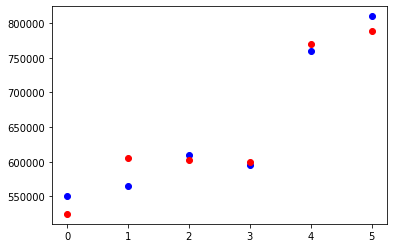

In [15]:
%matplotlib inline   
import matplotlib.pyplot as plt    #collection of functions that make matplotlib work like MATLAB
plt.figure()   #create figure using matplotlib.pyplot function
plt.scatter(x=list(range(0, 6)),y= y, color='blue')         
plt.scatter(x=list(range(0, 6)), y=yhat, color='red')
plt.show()

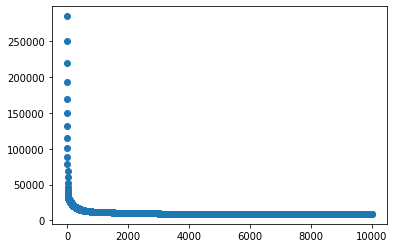

In [16]:
plt.figure()
plt.scatter(x=list(range(0, 10000)), y=J)
plt.show()